

---



---


#**Projeto Wallet_notebook**


> Objetivo deste notebook é gerar informações analíticas de uma carteira de investimentos com ativos e pesos selecionados.


> **Base de dados limitada a partir de 2021 por opção própria**.





##Código -

In [2]:
#Bibliotecas
!pip install -q yfinance;
import pandas as pd
import plotly.express as px
import yfinance as yf
import numpy as np
import plotly.subplots as sp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 3.3 MB/s eta 0:00:00


In [3]:
#@title
def creat_df(Ativos=list,Pesos=list,Fundo=float):
  df = pd.DataFrame()
  df['Ativo'],df['Peso']= Ativos,Pesos
  df['Fundo'] = df['Peso']*(Fundo/100)
  return df

def pie_chart(data,weitgh,stock):
  figure = px.pie(data, values = weitgh, names = stock , title= 'Distribuição da Carteira',width=900, height=400)
  figure.update_traces(textposition='outside', textinfo='percent+label')
  figure.show()

def wallet_generate(stocks_code):
  YF_datas = pd.DataFrame()
  for stock in stocks_code:
    YF_datas[stock] = yf.download(stock, start='2021-01-01',progress=0,)['Close']
    YF_datas.dropna(inplace=True)
  return YF_datas

def history(data):
  figure = px.line(title = 'Histórico de fechamento das ações (Início 2021-01-01)',width=1200, height=800)
  for i in data.columns:
    figure.add_scatter(x = data.index, y = data[i], name = i)
  figure.update_xaxes(
                      dtick="M1",
                      tickformat="%b\n%Y",
                      rangeslider_visible=True)
  return figure.show()

def grow_tx(df,date_init):
  taxa_crescimento = df.loc[date_init:].copy()
  for i in taxa_crescimento:
    taxa_crescimento[i] = (((taxa_crescimento[i] / taxa_crescimento[i][0])) -1) * 100

  figure = px.line(taxa_crescimento,
                   title = f'Taxa de crescimento das ações em relação ao início {date_init}',
                   width=1200, height=800)
  
  figure.update_layout(yaxis_title='Crescimento (%)',
                       xaxis_title='Data',
                       legend=dict(title='Ações'))
  
  figure.update_xaxes(
                      dtick="M1",
                      tickformat="%b\n%Y")

  return figure.show()

def box_var(df,date_init):
  variacao_d = df.loc[date_init:].copy()

  for i in variacao_d:
    variacao_d[i] = ((variacao_d[i] / variacao_d[i].shift(1)) - 1)*100 
  
  figure = px.box(variacao_d,
                  title = f'Boxplot variações diárias',
                  orientation='h',
                  #color_discrete_sequence=["purple"],
                  width=800, height=800)
  
  figure.update_layout(yaxis_title='Ação',
                       xaxis_title='Variações diária (%)',
                       legend=dict(title='Ações'))
  return figure.show()

def var_d_log(df,date_init):
  kk = df.loc[date_init:].copy()
  kk = np.log(kk)
  for i in kk:
    kk[i] = ( (kk[i] / kk[i].shift(1)) - 1)

  figure = px.line(kk,
                  title = f'Variação logarítmica diária da carteira (Início {date_init})',
                  width=1200, height=800)
  figure.update_layout(yaxis_title='Variação (logarítmica)',
                       xaxis_title='Período',
                       legend=dict(title='Ações'))
  figure.update_xaxes(
                      dtick="M1",
                      tickformat="%b\n%Y",
                      rangeslider_visible=True)  
  
  return figure.show()

def freq_var_acum(df,date_init):
  kk = df.loc[date_init:].copy()
  for i in kk:
    kk[i] = ((kk[i] / kk[i].shift(1))-1) * 100

  figure = px.histogram(kk,facet_col_wrap=2,
                  title = f'Distribuição total da variação diária por ativo (Início {date_init})',
                  width=1200, height=800)
  figure.update_layout(yaxis_title='Frequência',
                       xaxis_title='Variação diária (%)',
                       legend=dict(title='Ações'))
  
  return figure.show()

def freq_var(df,date_init):
  # configurando dataset
  kk = df.loc[date_init:].copy()
  for i in kk:
    kk[i] = ( (kk[i] / kk[i].shift(1)) - 1)
  kk.dropna(inplace=True)
  
  
  # Criando figura vazia com dois subplots
    # Ordenando número de colunas
  num_rows = round(len(kk.columns)/4)
  if len(kk.columns) % 4 == 1:
    num_rows = round(len(kk.columns)/4) + 1

  fig = sp.make_subplots(rows=num_rows, cols=4, subplot_titles=kk.columns)

  # Criando histogramas individuais
  col_ = 1
  row_ = 1
  for i in kk.columns:
    
    fig.add_histogram(x=kk[i], name=i, row=row_, col=col_)
    col_ += 1
    
    if col_ > 4:
      col_ = 1
      row_ += 1

  # Atualizar o layout da figura
  fig.update_layout(title=f'Distribuição da variação diária por ativo (Início {date_init})',
                    legend=dict(title='Ações'),
                    width=1200, height=800)
  
  return fig.show()





---



---


#Inserindo Dados

> Siga as instruções a seguir 
preencendo os campos com **" #---------------------Preencher "** em **verde**





###**---------------------------------------------------------------Ativos**

Selecione a nomeclatura dos ativos em carteira de acordo com o site: ➡ https://finance.yahoo.com

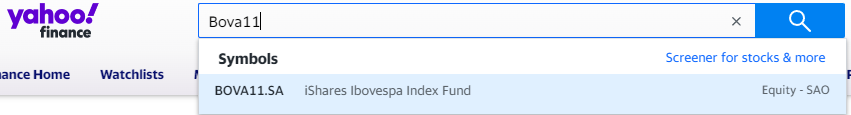

```
Exemplo : Ativos = ['BOVA11.SA', 'SBSP3.SA', ...]
```

In [4]:
#---------------------Preencher
Ativos = ["CIEL3.SA",
    "IRBR3.SA",
    "ITSA4.SA",
    "LOGN3.SA",
    "MGLU3.SA",
    "MXRF11.SA",
    "PETZ3.SA",
    "SBSP3.SA",
    "STBP3.SA",
    "TAEE11.SA",
    "VIIA3.SA",
    "BBSE3.SA"]

###**---------------------------------------------------------------Pesos**

Insira os pesos em porcentagem de acordo com a ordem da lista dos Ativos preenchida anteriormente.

Atenção ❗ 

A somatória dos pesos **precisam** dar 100% 

Ex: [50% + 50%] = 100%
```
           Ativos = ['BOVA11.SA', 'SBSP3.SA']
           ---------------Logo---------------
 Exemplo : Pesos = [50,50]
```

In [5]:
#---------------------Preencher
Pesos = [8,8,8,8,8,8,8,8,8,8,8,12]

###**---------------------------------------------------------------Fundo**

Insira o valor em dinheiro investido na carteira atualmente.

```
Exemplo : Fundo = 10000
```

In [6]:
#---------------------Preencher
Fundo = 1000

###**---------------------------------------------------------------Data início da carteira**

Insira a data de início para as análises.
Exemplo:
```
Exemplo : Data_inic = 'aaaa-mm-dd'
```

In [7]:
#---------------------Preencher
Data_inic = '2021-01-05'


---



---



# Análises

> Atualizar : CTRL + F9 



In [8]:
#@title
df = creat_df(Ativos,Pesos,Fundo)
yfdata = wallet_generate(Ativos)
df

,Ativo,Peso,Fundo
0,CIEL3.SA,8,80.0
1,IRBR3.SA,8,80.0
2,ITSA4.SA,8,80.0
3,LOGN3.SA,8,80.0
4,MGLU3.SA,8,80.0
5,MXRF11.SA,8,80.0
6,PETZ3.SA,8,80.0
7,SBSP3.SA,8,80.0
8,STBP3.SA,8,80.0
9,TAEE11.SA,8,80.0


<AxesSubplot:xlabel='Date'>

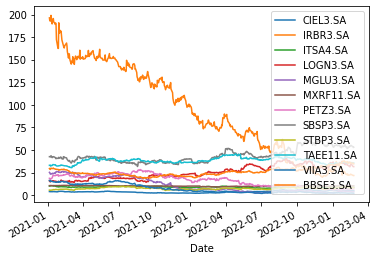

In [9]:
yfdata.plot()

Esta é a distribuição da sua carteira atualmente:

In [ ]:
#@title
pie_chart(df,df.Fundo,df.Ativo)

##Históricos

Histórico de fechamento por ação:

In [ ]:
#@title
history(yfdata)

Taxa de crescimento dos ativos em carteira:

In [ ]:
#@title
#---------------Para alterar a data, mude o valor de 'D'   ex: "aaaa-mm-dd"
D = Data_inic   # D = Data_inic  -------->para o padrão 

grow_tx(yfdata,D)

##Risco

Variação diária dos ativos

In [ ]:
#@title
box_var(yfdata,Data_inic)

In [ ]:
#@title
var_d_log(yfdata,Data_inic)

In [ ]:
#@title
freq_var_acum(yfdata,Data_inic)

In [ ]:
#@title
freq_var(yfdata,Data_inic)